<a href="https://colab.research.google.com/github/sacrafont/connection/blob/main/signal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

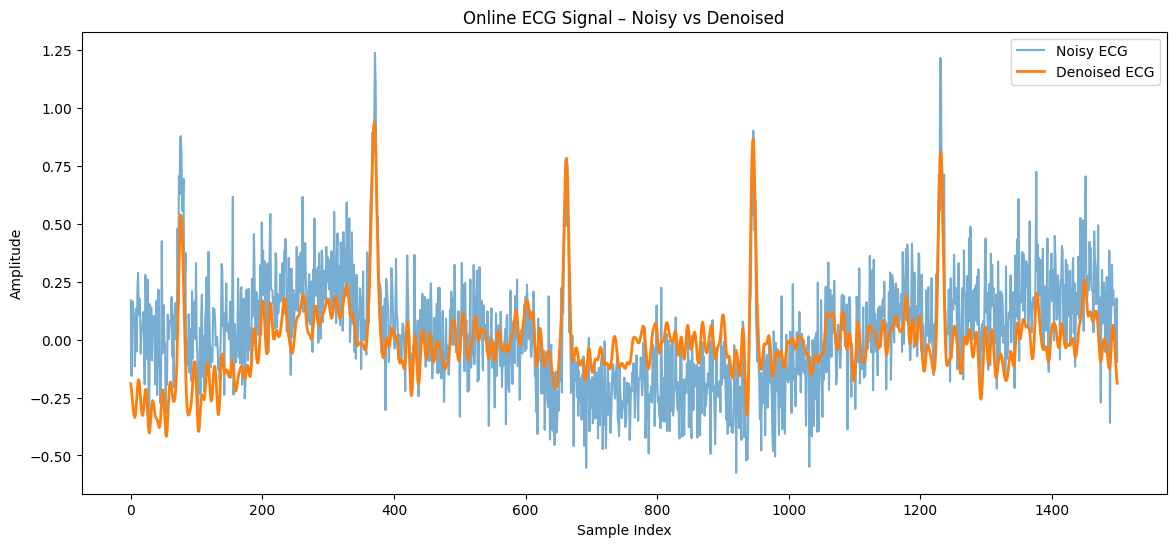

===== ANALYSIS RESULTS =====
Noisy Signal SNR: -2.88 dB
Denoised Signal SNR: 6.89 dB
R-peaks in clean signal: 2270
R-peaks in denoised signal: 2284


In [6]:
!pip install wfdb neurokit2 scipy matplotlib

import wfdb
import neurokit2 as nk
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

record = wfdb.rdrecord("100", pn_dir="mitdb")
signal = record.p_signal[:, 0]
fs = record.fs

clean_ecg = nk.ecg_clean(signal, sampling_rate=fs, method="neurokit")

noise = 0.15 * np.random.randn(len(clean_ecg))
baseline_wander = 0.2 * np.sin(2 * np.pi * 0.33 * np.arange(len(clean_ecg)) / fs)
noisy_ecg = clean_ecg + noise + baseline_wander

def bandpass_filter(sig, fs, low=0.5, high=40):
    nyq = 0.5 * fs
    b, a = butter(4, [low/nyq, high/nyq], btype="band")
    return filtfilt(b, a, sig)

denoised_ecg = bandpass_filter(noisy_ecg, fs)

def compute_snr(clean, test):
    noise = clean - test
    return 10 * np.log10(np.var(clean) / np.var(noise))

snr_noisy = compute_snr(clean_ecg, noisy_ecg)
snr_denoised = compute_snr(clean_ecg, denoised_ecg)

_, r_clean = nk.ecg_peaks(clean_ecg, sampling_rate=fs)
_, r_denoised = nk.ecg_peaks(denoised_ecg, sampling_rate=fs)

plt.figure(figsize=(14, 6))
plt.plot(noisy_ecg[:1500], label="Noisy ECG", alpha=0.6)
plt.plot(denoised_ecg[:1500], label="Denoised ECG", linewidth=2)
plt.legend()
plt.title("Online ECG Signal – Noisy vs Denoised")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

print("===== ANALYSIS RESULTS =====")
print(f"Noisy Signal SNR: {snr_noisy:.2f} dB")
print(f"Denoised Signal SNR: {snr_denoised:.2f} dB")
print(f"R-peaks in clean signal: {len(r_clean['ECG_R_Peaks'])}")
print(f"R-peaks in denoised signal: {len(r_denoised['ECG_R_Peaks'])}")

